# Intro to Quantum Computation
## Bloch sphere
## Qubit
## Basic Gates
## Entanglement(control gates)
## Phase kickback
## QFT(Quantum Fourier Transform)
## Quantum Phase estimation
## Grover's Algorithm
## TSP




In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute, transpile, assemble
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT
import numpy as np
from numpy import pi
import networkx
from IPython import display

# Bloch sphere

|
ψ
⟩
=
α
|
0
⟩
+
β
|
1
⟩

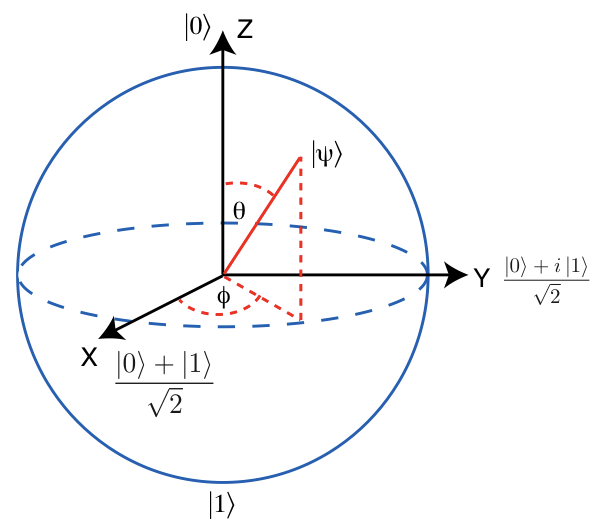

In [ ]:
display.Image("/content/drive/MyDrive/bloch.png")

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

{'1': 4124, '0': 4068}


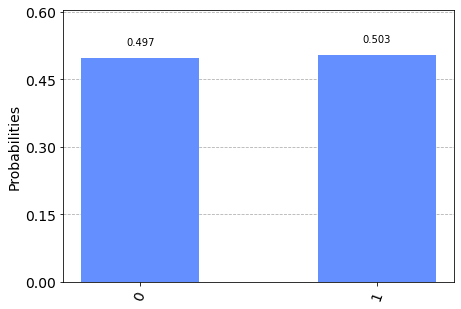

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

# Basic Gates

X
|
0
⟩
=
[
0
1
1
0
]
[
1
0
]
=
[
0
1
]
=
|
1
⟩

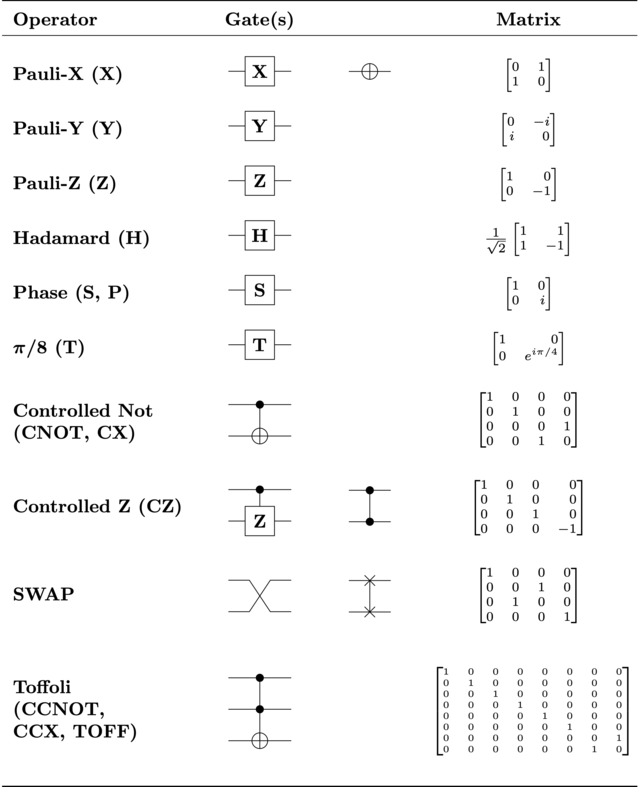

In [ ]:
display.Image("/content/drive/MyDrive/quantum_gates.png")

# Quantum Entanglement(Control Gates)

If we have n qubits, we will need to keep track of 2^n complex amplitudes. As we can see, these vectors grow exponentially with the number of qubits. This is the reason quantum computers with large numbers of qubits are so difficult to simulate. A modern laptop can easily simulate a general quantum state of around 20 qubits, but simulating 100 qubits is too difficult for the largest supercomputers.

Simple Bell state

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1) #DEMO
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

{'00': 4100, '11': 4092}


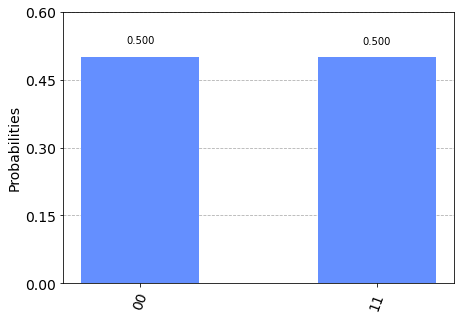

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

# Phase Kickback

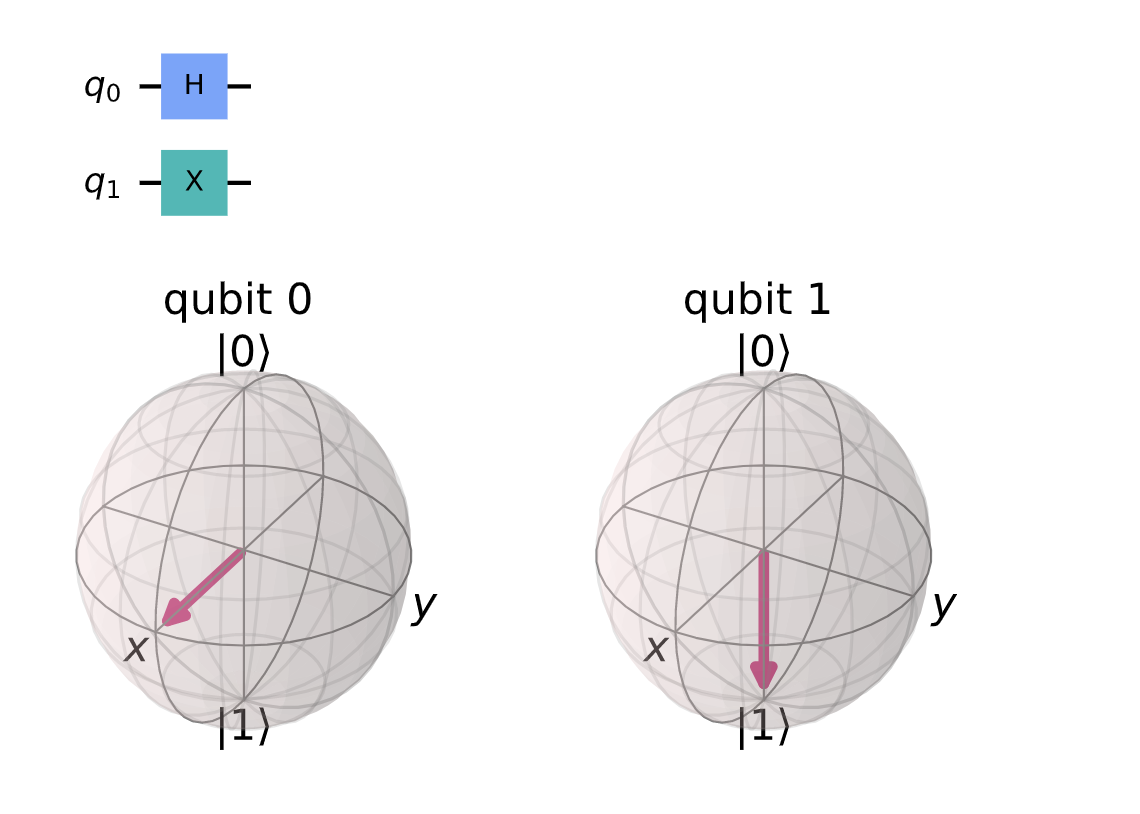

In [ ]:
display.Image("/content/drive/MyDrive/ph_kickback2.png")

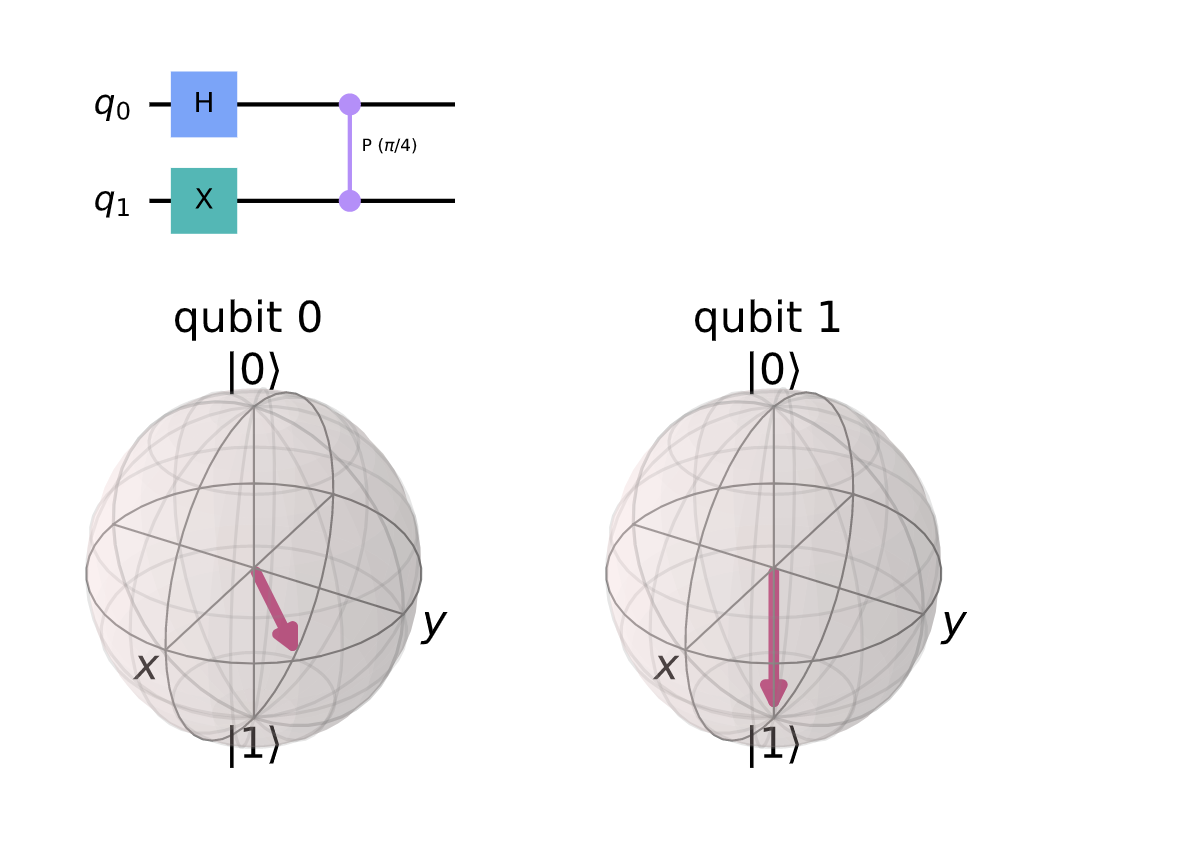

In [ ]:
display.Image("/content/drive/MyDrive/ph_kickback1.png")

#QFT(Quantum Fourier Transform)

https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#:~:text=In%20the%20computational%20basis%2C%20we%20store%20numbers%20in%20binary%20using%20the%20states

#Quantum Phase Estimation

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#:~:text=%3A-,1.1%20Intuition,-The%20quantum%20phase

# Grover's Algorithm


https://qiskit.org/textbook/ch-algorithms/grover.html

# TSP 

https://qiskit.org/textbook/ch-paper-implementations/tsp.html

In [ ]:
G = networkx.Graph()

In [ ]:
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)

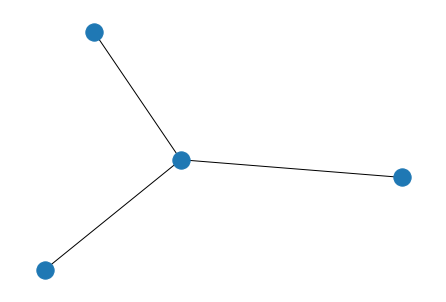

In [ ]:
networkx.draw(G)

In [ ]:
G_complete_m1 = networkx.complete_graph(4)

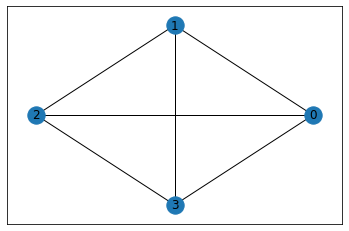

In [ ]:
networkx.draw_networkx(G_complete_m1, pos=networkx.circular_layout(G_complete_m1))

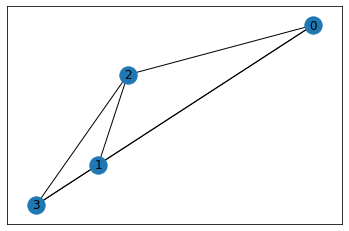

In [ ]:
networkx.draw_networkx(G_complete_m1,pos=networkx.random_layout(G_complete_m1))

In [ ]:
!pip install qiskit -U


In [ ]:
unit = QuantumRegister(6,"unit")
eigen = QuantumRegister(8,"eigen")
unit_class1 = ClassicalRegister(6,"unit_cl1")
qc = QuantumCircuit(unit,eigen,unit_class1)

In [ ]:
def controlled_unitary(qc, qubits: list, phases: list): 
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # controlled-U1(c-a)
    qc.p(phases[0], qubits[0]) # U1(a)
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # controlled-U1(b-a)
    
    # controlled controlled U1(d-c+a-b)
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

def U(times, qc, unit, eigen, phases: list): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4
    controlled_unitary(qc, [unit[0]]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0]]+eigen[2:4], [phases[3]]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0]]+eigen[4:6], phases[6:8]+[0]+[phases[8]])
    controlled_unitary(qc, [unit[0]]+eigen[6:8], phases[9:12]+[0])

def final_U(times, eigen, phases: list):
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

def eigenstates(qc, eigen, index):
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

In [ ]:
eigen_values = ["11000110", "10001101", "11001001"]

In [ ]:
eigenstates(qc, eigen, 0)

# Hadamard on the 'unit' qubits
qc.h(unit[:])
qc.barrier()
#

# Controlled Unitary  
phases = [pi / 2, pi / 8, pi / 4, pi / 2, pi / 4, pi / 4, pi / 8, pi / 4, pi / 8, pi / 4, pi / 4, pi / 8] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
qc.append(qft, qc.qubits[:len(unit)])
qc.barrier()
#

# Measure
qc.measure(unit, unit_class1)

qc.draw()

░ ┌───┐ ░                                          ┌───────┐»
    unit_0: ──────░─┤ H ├─░──────────────────────────────────────────┤0      ├»
                  ░ ├───┤ ░                                 ┌───────┐│       │»
    unit_1: ──────░─┤ H ├─░─────────────────────────────────┤0      ├┤       ├»
                  ░ ├───┤ ░                         ┌──────┐│       ││       │»
    unit_2: ──────░─┤ H ├─░─────────────────────────┤0     ├┤       ├┤       ├»
                  ░ ├───┤ ░                 ┌──────┐│      ││       ││       │»
    unit_3: ──────░─┤ H ├─░─────────────────┤0     ├┤      ├┤       ├┤       ├»
                  ░ ├───┤ ░         ┌──────┐│      ││      ││       ││       │»
    unit_4: ──────░─┤ H ├─░─────────┤0     ├┤      ├┤      ├┤       ├┤       ├»
                  ░ ├───┤ ░ ┌──────┐│      ││      ││      ││       ││       │»
    unit_5: ──────░─┤ H ├─░─┤0     ├┤      ├┤      ├┤      ├┤       ├┤       ├»
            ┌───┐ ░ └───┘ ░ │      ││      ││      ││      ││       ││       │»
   eigen_0: ┤ X ├─░───────░─┤1     ├┤1     ├┤1     ├┤1     ├┤1      ├┤1      ├»
            ├───┤ ░       ░ │      ││      ││      ││      ││       ││  U_32 │»
   eigen_1: ┤ X ├─░───────░─┤2     ├┤2     ├┤2     ├┤2     ├┤2 U_16 ├┤2      ├»
            └───┘ ░       ░ │      ││      ││      ││  U_8 ││       ││       │»
   eigen_2: ──────░───────░─┤3     ├┤3     ├┤3 U_4 ├┤3     ├┤3      ├┤3      ├»
                  ░       ░ │      ││  U_2 ││      ││      ││       ││       │»
   eigen_3: ──────░───────░─┤4 U_1 ├┤4     ├┤4     ├┤4     ├┤4      ├┤4      ├»
                  ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_4: ──────░───────░─┤5     ├┤5     ├┤5     ├┤5     ├┤5      ├┤5      ├»
            ┌───┐ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_5: ┤ X ├─░───────░─┤6     ├┤6     ├┤6     ├┤6     ├┤6      ├┤6      ├»
            ├───┤ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_6: ┤ X ├─░───────░─┤7     ├┤7     ├┤7     ├┤7     ├┤7      ├┤7      ├»
            └───┘ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_7: ──────░───────░─┤8     ├┤8     ├┤8     ├┤8     ├┤8      ├┤8      ├»
                  ░       ░ └──────┘└──────┘└──────┘└──────┘└───────┘└───────┘»
unit_cl1: 6/══════════════════════════════════════════════════════════════════»
                                                                              »
«             ░ ┌──────────────┐ ░ ┌─┐               
«    unit_0: ─░─┤0             ├─░─┤M├───────────────
«             ░ │              │ ░ └╥┘┌─┐            
«    unit_1: ─░─┤1             ├─░──╫─┤M├────────────
«             ░ │              │ ░  ║ └╥┘┌─┐         
«    unit_2: ─░─┤2             ├─░──╫──╫─┤M├─────────
«             ░ │  Inverse QFT │ ░  ║  ║ └╥┘┌─┐      
«    unit_3: ─░─┤3             ├─░──╫──╫──╫─┤M├──────
«             ░ │              │ ░  ║  ║  ║ └╥┘┌─┐   
«    unit_4: ─░─┤4             ├─░──╫──╫──╫──╫─┤M├───
«             ░ │              │ ░  ║  ║  ║  ║ └╥┘┌─┐
«    unit_5: ─░─┤5             ├─░──╫──╫──╫──╫──╫─┤M├
«             ░ └──────────────┘ ░  ║  ║  ║  ║  ║ └╥┘
«   eigen_0: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_1: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_2: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_3: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_4: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_5: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_6: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_7: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░           

{'100100': 8192}


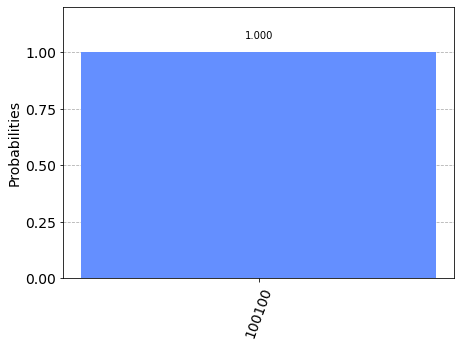

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
unit = QuantumRegister(6,"unit")
eigen = QuantumRegister(8,"eigen")
unit_class1 = ClassicalRegister(6,"unit_cl1")
qc = QuantumCircuit(unit,eigen,unit_class1)

In [ ]:
eigenstates(qc, eigen, 1)

# Hadamard on the 'unit' qubits
qc.h(unit[:])
qc.barrier()
#

# Controlled Unitary  
phases = [pi / 2, pi / 8, pi / 4, pi / 2, pi / 4, pi / 4, pi / 8, pi / 4, pi / 8, pi / 4, pi / 4, pi / 8] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
qc.append(qft, qc.qubits[:len(unit)])
qc.barrier()
#

# Measure
qc.measure(unit, unit_class1)

qc.draw()

░ ┌───┐ ░                                          ┌───────┐»
    unit_0: ──────░─┤ H ├─░──────────────────────────────────────────┤0      ├»
                  ░ ├───┤ ░                                 ┌───────┐│       │»
    unit_1: ──────░─┤ H ├─░─────────────────────────────────┤0      ├┤       ├»
                  ░ ├───┤ ░                         ┌──────┐│       ││       │»
    unit_2: ──────░─┤ H ├─░─────────────────────────┤0     ├┤       ├┤       ├»
                  ░ ├───┤ ░                 ┌──────┐│      ││       ││       │»
    unit_3: ──────░─┤ H ├─░─────────────────┤0     ├┤      ├┤       ├┤       ├»
                  ░ ├───┤ ░         ┌──────┐│      ││      ││       ││       │»
    unit_4: ──────░─┤ H ├─░─────────┤0     ├┤      ├┤      ├┤       ├┤       ├»
                  ░ ├───┤ ░ ┌──────┐│      ││      ││      ││       ││       │»
    unit_5: ──────░─┤ H ├─░─┤0     ├┤      ├┤      ├┤      ├┤       ├┤       ├»
            ┌───┐ ░ └───┘ ░ │      ││      ││      ││      ││       ││       │»
   eigen_0: ┤ X ├─░───────░─┤1     ├┤1     ├┤1     ├┤1     ├┤1      ├┤1      ├»
            └───┘ ░       ░ │      ││      ││      ││      ││       ││  U_32 │»
   eigen_1: ──────░───────░─┤2     ├┤2     ├┤2     ├┤2     ├┤2 U_16 ├┤2      ├»
                  ░       ░ │      ││      ││      ││  U_8 ││       ││       │»
   eigen_2: ──────░───────░─┤3     ├┤3     ├┤3 U_4 ├┤3     ├┤3      ├┤3      ├»
                  ░       ░ │      ││  U_2 ││      ││      ││       ││       │»
   eigen_3: ──────░───────░─┤4 U_1 ├┤4     ├┤4     ├┤4     ├┤4      ├┤4      ├»
            ┌───┐ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_4: ┤ X ├─░───────░─┤5     ├┤5     ├┤5     ├┤5     ├┤5      ├┤5      ├»
            ├───┤ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_5: ┤ X ├─░───────░─┤6     ├┤6     ├┤6     ├┤6     ├┤6      ├┤6      ├»
            └───┘ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_6: ──────░───────░─┤7     ├┤7     ├┤7     ├┤7     ├┤7      ├┤7      ├»
            ┌───┐ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_7: ┤ X ├─░───────░─┤8     ├┤8     ├┤8     ├┤8     ├┤8      ├┤8      ├»
            └───┘ ░       ░ └──────┘└──────┘└──────┘└──────┘└───────┘└───────┘»
unit_cl1: 6/══════════════════════════════════════════════════════════════════»
                                                                              »
«             ░ ┌──────────────┐ ░ ┌─┐               
«    unit_0: ─░─┤0             ├─░─┤M├───────────────
«             ░ │              │ ░ └╥┘┌─┐            
«    unit_1: ─░─┤1             ├─░──╫─┤M├────────────
«             ░ │              │ ░  ║ └╥┘┌─┐         
«    unit_2: ─░─┤2             ├─░──╫──╫─┤M├─────────
«             ░ │  Inverse QFT │ ░  ║  ║ └╥┘┌─┐      
«    unit_3: ─░─┤3             ├─░──╫──╫──╫─┤M├──────
«             ░ │              │ ░  ║  ║  ║ └╥┘┌─┐   
«    unit_4: ─░─┤4             ├─░──╫──╫──╫──╫─┤M├───
«             ░ │              │ ░  ║  ║  ║  ║ └╥┘┌─┐
«    unit_5: ─░─┤5             ├─░──╫──╫──╫──╫──╫─┤M├
«             ░ └──────────────┘ ░  ║  ║  ║  ║  ║ └╥┘
«   eigen_0: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_1: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_2: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_3: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_4: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_5: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_6: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_7: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░           

{'100000': 8192}


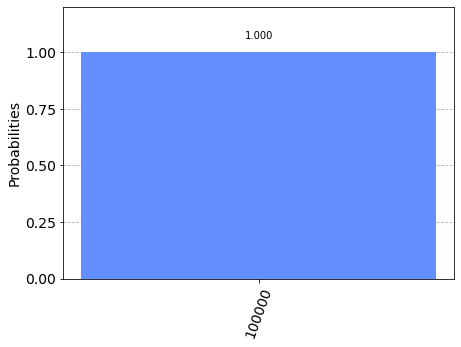

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

In [ ]:
unit = QuantumRegister(6,"unit")
eigen = QuantumRegister(8,"eigen")
unit_class1 = ClassicalRegister(6,"unit_cl1")
qc = QuantumCircuit(unit,eigen,unit_class1)

In [ ]:
eigenstates(qc, eigen, 2)

# Hadamard on the 'unit' qubits
qc.h(unit[:])
qc.barrier()
#

# Controlled Unitary  
phases = [pi / 2, pi / 8, pi / 4, pi / 2, pi / 4, pi / 4, pi / 8, pi / 4, pi / 8, pi / 4, pi / 4, pi / 8] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
qc.append(qft, qc.qubits[:len(unit)])
qc.barrier()
#

# Measure
qc.measure(unit, unit_class1)

qc.draw()

░ ┌───┐ ░                                          ┌───────┐»
    unit_0: ──────░─┤ H ├─░──────────────────────────────────────────┤0      ├»
                  ░ ├───┤ ░                                 ┌───────┐│       │»
    unit_1: ──────░─┤ H ├─░─────────────────────────────────┤0      ├┤       ├»
                  ░ ├───┤ ░                         ┌──────┐│       ││       │»
    unit_2: ──────░─┤ H ├─░─────────────────────────┤0     ├┤       ├┤       ├»
                  ░ ├───┤ ░                 ┌──────┐│      ││       ││       │»
    unit_3: ──────░─┤ H ├─░─────────────────┤0     ├┤      ├┤       ├┤       ├»
                  ░ ├───┤ ░         ┌──────┐│      ││      ││       ││       │»
    unit_4: ──────░─┤ H ├─░─────────┤0     ├┤      ├┤      ├┤       ├┤       ├»
                  ░ ├───┤ ░ ┌──────┐│      ││      ││      ││       ││       │»
    unit_5: ──────░─┤ H ├─░─┤0     ├┤      ├┤      ├┤      ├┤       ├┤       ├»
            ┌───┐ ░ └───┘ ░ │      ││      ││      ││      ││       ││       │»
   eigen_0: ┤ X ├─░───────░─┤1     ├┤1     ├┤1     ├┤1     ├┤1      ├┤1      ├»
            ├───┤ ░       ░ │      ││      ││      ││      ││       ││  U_32 │»
   eigen_1: ┤ X ├─░───────░─┤2     ├┤2     ├┤2     ├┤2     ├┤2 U_16 ├┤2      ├»
            └───┘ ░       ░ │      ││      ││      ││  U_8 ││       ││       │»
   eigen_2: ──────░───────░─┤3     ├┤3     ├┤3 U_4 ├┤3     ├┤3      ├┤3      ├»
                  ░       ░ │      ││  U_2 ││      ││      ││       ││       │»
   eigen_3: ──────░───────░─┤4 U_1 ├┤4     ├┤4     ├┤4     ├┤4      ├┤4      ├»
            ┌───┐ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_4: ┤ X ├─░───────░─┤5     ├┤5     ├┤5     ├┤5     ├┤5      ├┤5      ├»
            └───┘ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_5: ──────░───────░─┤6     ├┤6     ├┤6     ├┤6     ├┤6      ├┤6      ├»
                  ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_6: ──────░───────░─┤7     ├┤7     ├┤7     ├┤7     ├┤7      ├┤7      ├»
            ┌───┐ ░       ░ │      ││      ││      ││      ││       ││       │»
   eigen_7: ┤ X ├─░───────░─┤8     ├┤8     ├┤8     ├┤8     ├┤8      ├┤8      ├»
            └───┘ ░       ░ └──────┘└──────┘└──────┘└──────┘└───────┘└───────┘»
unit_cl1: 6/══════════════════════════════════════════════════════════════════»
                                                                              »
«             ░ ┌──────────────┐ ░ ┌─┐               
«    unit_0: ─░─┤0             ├─░─┤M├───────────────
«             ░ │              │ ░ └╥┘┌─┐            
«    unit_1: ─░─┤1             ├─░──╫─┤M├────────────
«             ░ │              │ ░  ║ └╥┘┌─┐         
«    unit_2: ─░─┤2             ├─░──╫──╫─┤M├─────────
«             ░ │  Inverse QFT │ ░  ║  ║ └╥┘┌─┐      
«    unit_3: ─░─┤3             ├─░──╫──╫──╫─┤M├──────
«             ░ │              │ ░  ║  ║  ║ └╥┘┌─┐   
«    unit_4: ─░─┤4             ├─░──╫──╫──╫──╫─┤M├───
«             ░ │              │ ░  ║  ║  ║  ║ └╥┘┌─┐
«    unit_5: ─░─┤5             ├─░──╫──╫──╫──╫──╫─┤M├
«             ░ └──────────────┘ ░  ║  ║  ║  ║  ║ └╥┘
«   eigen_0: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_1: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_2: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_3: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_4: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_5: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_6: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░                  ░  ║  ║  ║  ║  ║  ║ 
«   eigen_7: ─░──────────────────░──╫──╫──╫──╫──╫──╫─
«             ░           

{'100000': 8192}


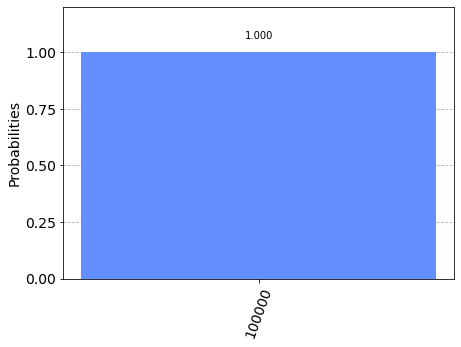

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)